In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('realistic_employee_performance_dirty.csv')

In [39]:
df.head()

,EmployeeID,Age,Department,Education,Years_Experience,Monthly_Salary,Performance_Score
0,1037.0,24.0,Finance,NaN,15.0,75000.0,5.0
1,1140.0,45.0,NaN,NaN,36.0,NaN,1.0
2,1072.0,37.0,Sales,PhD,16.0,NaN,NaN
3,1137.0,36.0,HR,PhD,9.0,65000.0,NaN
4,1133.0,28.0,Finance,Master,19.0,NaN,2.0


In [40]:
df.describe()

,EmployeeID,Age,Years_Experience,Monthly_Salary,Performance_Score
count,318.000000,308.000000,312.000000,298.000000,267.000000
mean,1097.279874,41.743506,19.567308,67181.208054,3.067416
std,57.758337,10.901205,11.419590,28910.183377,1.464860
min,1000.000000,21.000000,0.000000,20000.000000,1.000000
25%,1046.250000,33.000000,11.000000,45000.000000,2.000000
50%,1096.000000,43.000000,20.000000,65000.000000,3.000000
75%,1144.750000,51.000000,29.250000,90000.000000,4.000000
max,1199.000000,59.000000,39.000000,115000.000000,5.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         318 non-null    float64
 1   Age                308 non-null    float64
 2   Department         266 non-null    object 
 3   Education          257 non-null    object 
 4   Years_Experience   312 non-null    float64
 5   Monthly_Salary     298 non-null    float64
 6   Performance_Score  267 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.6+ KB


* **Q1 ▶ Dataset me kitne rows aur columns hain?**

In [42]:
df.shape

(320, 7)

* **Answer 1 ▶** **[ Rows ➡ 320  &  Columns ➡ 7 ]**

* **Q2 ▶Kaun-kaun se columns me null values hain?**

In [43]:
df.isnull().sum()

,0
EmployeeID,2
Age,12
Department,54
Education,63
Years_Experience,8
Monthly_Salary,22
Performance_Score,53


* **Answer 2 ▶ ['EmployeeID', 'Age', 'Department', 'Education', 'Years_Experience', 'Monthly_Salary', 'Performance_Score']**

* **Q3 ▶Har column me null percentage nikaalo**

In [44]:
df.isnull().mean()

,0
EmployeeID,0.006250
Age,0.037500
Department,0.168750
Education,0.196875
Years_Experience,0.025000
Monthly_Salary,0.068750
Performance_Score,0.165625


???????????

In [45]:
df.isnull().sum()/df.shape[0]*100

,0
EmployeeID,0.6250
Age,3.7500
Department,16.8750
Education,19.6875
Years_Experience,2.5000
Monthly_Salary,6.8750
Performance_Score,16.5625


* **Answer 3 ▶**
          
          EmployeeID ➡
          Age ➡
          Department ➡
          Education ➡
          Years_Experience ➡
          Monthly_Salary ➡
          Performance_Score ➡

* **Q4 ▶Dataset me duplicate rows kitni hain?**

In [46]:
df.duplicated().sum()

np.int64(20)

* **Answer 4 ▶ 20**

* **Q5 ▶Duplicate rows remove karo**

* **Answer 5 ⤵**

In [47]:
df.drop_duplicates(inplace = True)

In [48]:
df.duplicated().sum()

np.int64(0)

* **Q6 ▶Missing numeric values ko mean se fill karo (without column name)**


* **Answer 6 ⤵**

In [49]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [50]:
df.isnull().sum()

,0
EmployeeID,0
Age,0
Department,51
Education,58
Years_Experience,0
Monthly_Salary,0
Performance_Score,0


* **Q7 ▶Missing categorical values ko mode / 'Unknown' se fill karo**

* **Answer 7 ⤵**

In [51]:
df.fillna('Unknown', inplace = True)

In [52]:
df.isnull().sum()

,0
EmployeeID,0
Age,0
Department,0
Education,0
Years_Experience,0
Monthly_Salary,0
Performance_Score,0


* **Q8 ▶ Average monthly salary department-wise kya hai?**

* **Answer 8 ⤵**

In [53]:
df.groupby('Department')['Monthly_Salary'].mean()

,Monthly_Salary
Department,
Finance,64807.011534
HR,70356.611263
IT,64607.813749
Sales,74480.023124
Unknown,60822.753562


* **Q9 ▶ Education level vs salary ka relation kya hai?**

* **Answer 9 ⤵**

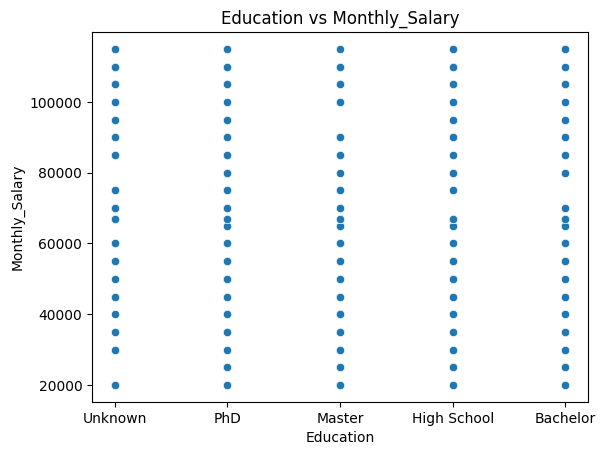

In [71]:
sns.scatterplot(x='Education', y='Monthly_Salary', data=df)
plt.title("Education vs Monthly_Salary")
plt.xlabel("Education")
plt.ylabel("Monthly_Salary")
plt.show()

In [54]:
df.head()

,EmployeeID,Age,Department,Education,Years_Experience,Monthly_Salary,Performance_Score
0,1037.0,24.0,Finance,Unknown,15.0,75000.000000,5.000
1,1140.0,45.0,Unknown,Unknown,36.0,66960.431655,1.000
2,1072.0,37.0,Sales,PhD,16.0,66960.431655,3.048
3,1137.0,36.0,HR,PhD,9.0,65000.000000,3.048
4,1133.0,28.0,Finance,Master,19.0,66960.431655,2.000


In [55]:
from sklearn.preprocessing import LabelEncoder as le

In [56]:
df['Education_encoded'] = le().fit_transform(df['Education'])

In [57]:
df.head()

,EmployeeID,Age,Department,Education,Years_Experience,Monthly_Salary,Performance_Score,Education_encoded
0,1037.0,24.0,Finance,Unknown,15.0,75000.000000,5.000,4
1,1140.0,45.0,Unknown,Unknown,36.0,66960.431655,1.000,4
2,1072.0,37.0,Sales,PhD,16.0,66960.431655,3.048,3
3,1137.0,36.0,HR,PhD,9.0,65000.000000,3.048,3
4,1133.0,28.0,Finance,Master,19.0,66960.431655,2.000,2


In [58]:
df['Education_encoded'].corr(df['Monthly_Salary'])

np.float64(0.094709664336426)

* **Answer 9 ▶ There is no linear realtion its a weak positive relation**

* **Q10 ▶ Kya experience badhne se salary badhti hai?**

* **Answer 10 ⤵**

In [59]:
df.Years_Experience.corr(df.Monthly_Salary)

np.float64(-0.0024354401804130995)

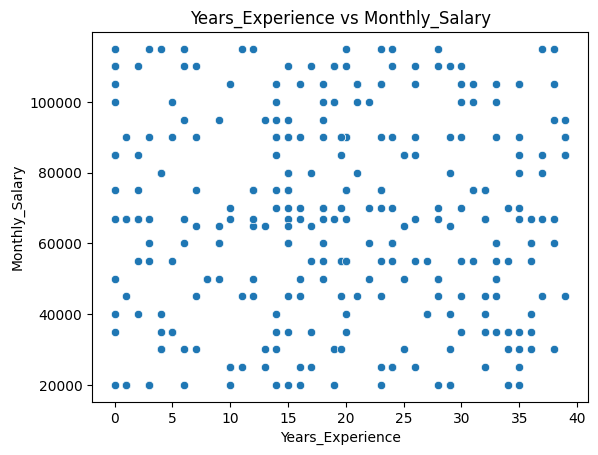

In [60]:
sns.scatterplot(x='Years_Experience', y='Monthly_Salary', data=df)
plt.title('Years_Experience vs Monthly_Salary')
plt.xlabel('Years_Experience')
plt.ylabel('Monthly_Salary')
plt.show()

* **Answer 10 ▶ We see here there is a negative corr relation between Experience and Monthly_Salary which means Salary not increases with years_Experience**

* **Q11 ▶ Performance score ka distribution kaisa hai?**

* **Answer 11 ⤵**

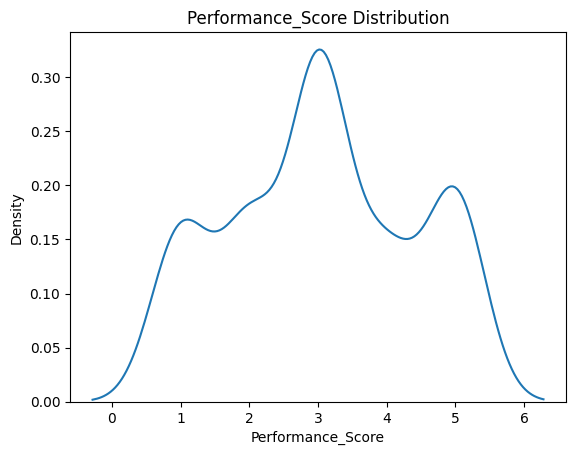

In [61]:
sns.kdeplot(df['Performance_Score'])
plt.title('Performance_Score Distribution')
plt.show()

* **Q12 ▶ Kaunsa department me high performance zyada hai?**

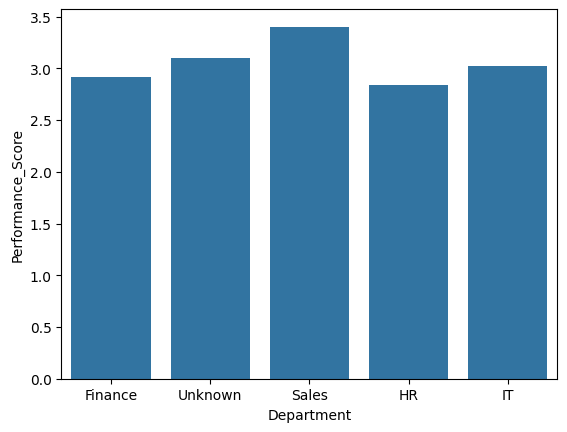

In [62]:
sns.barplot(x='Department', y='Performance_Score', data=df , errorbar = None)
plt.show()

In [63]:
encoded_score = []
for values in df['Performance_Score']:
  if values <= 2:
    encoded_score.append('Low')
  elif values <= 3:
    encoded_score.append('Average')
  elif values <= 4:
    encoded_score.append('Good')
  else:
    encoded_score.append('Excellent')
df['Performance_encoded'] = encoded_score
df.groupby('Department')['Performance_encoded'].value_counts()

Department  Performance_encoded
Finance     Low                    27
            Good                   15
            Excellent              13
            Average                 8
HR          Low                    22
            Average                14
            Good                   13
            Excellent               9
IT          Good                   26
            Low                    23
            Excellent              12
            Average                11
Sales       Good                   21
            Excellent              15
            Low                    13
            Average                 7
Unknown     Good                   15
            Low                    15
            Excellent              12
            Average                 9
Name: count, dtype: int64

* **Answer 12 ▶ This shows that "Sales" Department have highest Performance_Score**

* **Q13 ▶ Salary distribution dikhao (histplot)**

* **Answer 13 ▶ ⤵**

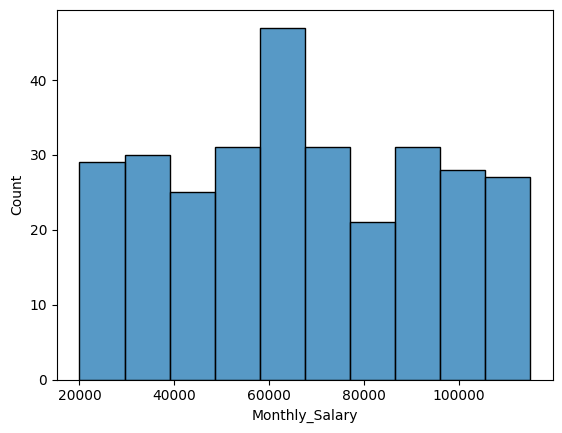

In [64]:
sns.histplot(df['Monthly_Salary'])
plt.show()

* **Q14 ▶ Department vs Salary (boxplot)**

* **Answer 14 ▶ ⤵**

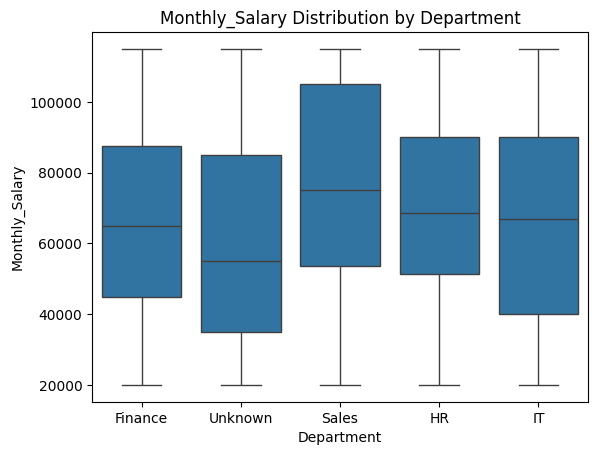

In [65]:
sns.boxplot(x='Department', y='Monthly_Salary', data=df)

plt.title('Monthly_Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Monthly_Salary')
plt.show()

* **Q15 ▶ Experience vs Performance (scatterplot)**

* **Answer 15 ▶ ⤵**

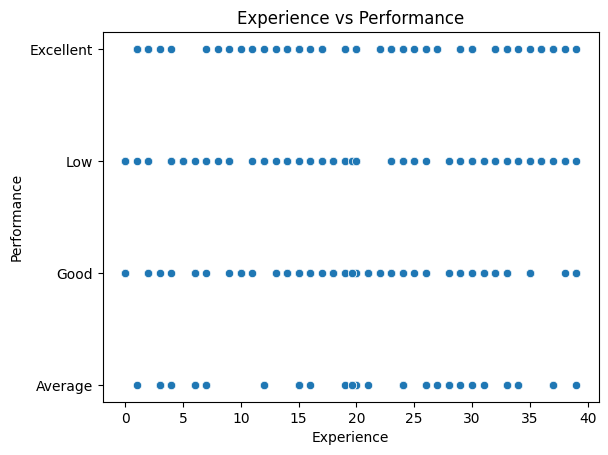

In [66]:
sns.scatterplot(x="Years_Experience" , y="Performance_encoded" ,data=df)
plt.title('Experience vs Performance')
plt.xlabel('Experience')
plt.ylabel('Performance')
plt.show()

* **Q16 ▶ Education vs Performance (barplot)**

* **Answer 16 ▶ ⤵**

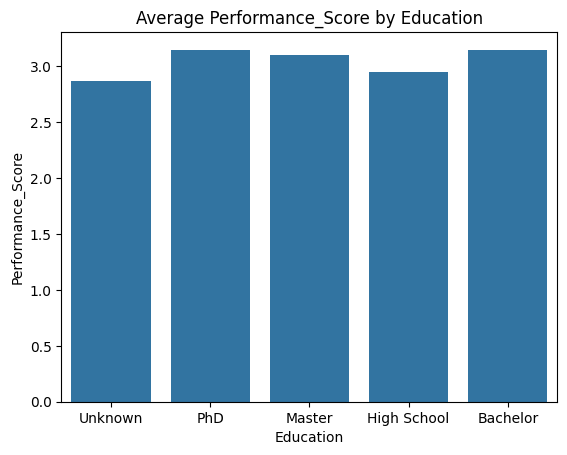

In [67]:
sns.barplot(x='Education', y='Performance_Score', data=df , errorbar = None)
plt.title('Average Performance_Score by Education')

plt.show()

* **Q17 ▶ Correlation heatmap banao**

* **Answer 17 ▶ ⤵**

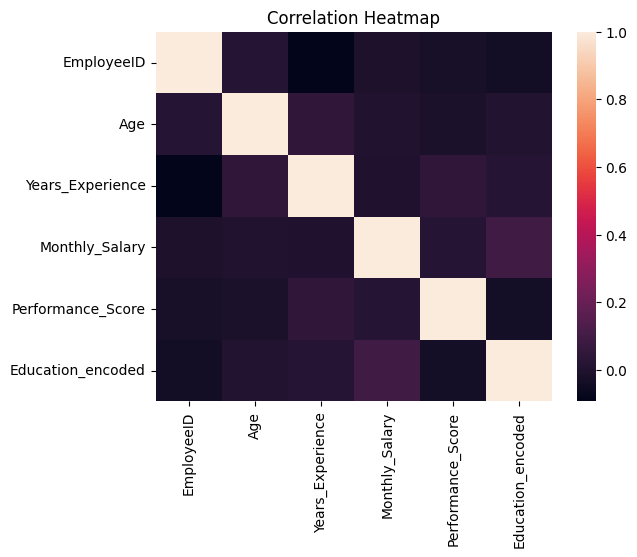

In [76]:
corr = df.select_dtypes(include = ['number']).corr()
sns.heatmap(corr)
plt.title('Correlation Heatmap')
plt.show()